In [0]:
import os
import re
import datetime
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
class NarouCategory:
    categories = {
        '異世界〔恋愛〕': 0,
        '現実世界〔恋愛〕': 1,
        'ハイファンタジー〔ファンタジー〕': 2,
        'ローファンタジー〔ファンタジー〕': 3,
        '純文学〔文芸〕': 4,
        'ヒューマンドラマ〔文芸〕': 5,
        '歴史〔文芸〕': 6,
        '推理〔文芸〕': 7,
        'ホラー〔文芸〕': 8,
        'アクション〔文芸〕': 9,
        'コメディー〔文芸〕': 10,
        'VRゲーム〔SF〕': 11,
        '宇宙〔SF〕': 12,
        '空想科学〔SF〕': 13,
        'パニック〔SF〕': 14,
        '童話〔その他〕': 15,
        '詩〔その他〕': 16,
        'エッセイ〔その他〕': 17,
        'リプレイ〔その他〕': 18,
        'その他〔その他〕': 19,
        'ノンジャンル〔ノンジャンル〕': 20,
    }
    categories_reversed = dict(map(reversed, categories.items()))

    @classmethod
    def to_num(cls, text):
        return cls.categories.get(text, 20)

    @classmethod
    def to_text(cls, num):
        return cls.categories_reversed.get(num, 'ノンジャンル〔ノンジャンル〕')

In [0]:
import csv

novels = {}

novels_csv_path =  '/content/drive/My Drive/kikagaku/novelapp/data/novels.csv'

with open(novels_csv_path, 'r', encoding='utf-8') as f:
    for row in csv.reader(f):
      novels[row[0]] = NarouCategory.to_num(row[1])

In [42]:
novels

{'3961': 0,
 '3999': 1,
 '4001': 9,
 '4003': 0,
 '4004': 2,
 '4006': 2,
 '4007': 0,
 '4013': 2,
 '4014': 2,
 '4015': 2,
 '4016': 0,
 '4017': 2,
 '4018': 5,
 '4019': 2,
 '4022': 0,
 '4023': 2,
 '4024': 0,
 '4025': 0,
 '4026': 0,
 '4027': 2,
 '4028': 2,
 '4061': 11,
 '4067': 2,
 '4068': 2,
 '4069': 3,
 '4071': 2,
 '4072': 0,
 '4074': 2,
 '4075': 2,
 '4076': 0,
 '4077': 2,
 '4078': 1,
 '4079': 2}

In [0]:
images_search_path = '/content/drive/My Drive/kikagaku/novelapp/data/images/*'

image_paths = glob(images_search_path)

In [44]:
print(len(image_paths))

37


In [0]:
def prepae_data(paths):
    x, t = [], []

    for i, p in enumerate(paths):
        book_id = re.sub(r'(_.*$)', '', os.path.basename(p))
        category = novels.get(book_id)
        print(datetime.datetime.now().isoformat(), 'Load:', i, book_id, category)
        if not category:
          continue

        try:
            img = Image.open(p)
            img_resize = img.resize((229, 229))
            img_np = np.array(img_resize) / 255.0
            img_reshape = img_np.reshape(1, 229, 229, 3)
            #print(datetime.datetime.now().isoformat(), img_np.shape, img_reshape.shape)

            x.append(img_np)
            t.append(category)
        except Exception as e:
            print(e, filepath, 'error')

    return x, t

In [46]:
x, t = prepae_data(image_paths)

2020-05-25T07:41:45.706116 Load: 0 4022 0
2020-05-25T07:41:45.706275 Load: 1 4018 5
2020-05-25T07:41:45.723110 Load: 2 4074 2
2020-05-25T07:41:45.734393 Load: 3 4079 2
2020-05-25T07:41:45.745811 Load: 4 4004 2
2020-05-25T07:41:45.755437 Load: 5 4017 2
2020-05-25T07:41:45.765745 Load: 6 4016 0
2020-05-25T07:41:45.766360 Load: 7 4075 2
2020-05-25T07:41:45.776687 Load: 8 3961 0
2020-05-25T07:41:45.777270 Load: 9 4078 1
2020-05-25T07:41:45.786880 Load: 10 4068 2
2020-05-25T07:41:45.796553 Load: 11 4023 2
2020-05-25T07:41:45.806423 Load: 12 4076 0
2020-05-25T07:41:45.806655 Load: 13 4061 11
2020-05-25T07:41:45.817455 Load: 14 4027 2
2020-05-25T07:41:45.827196 Load: 15 3999 1
2020-05-25T07:41:45.836909 Load: 16 4028 2
2020-05-25T07:41:45.846258 Load: 17 4077 2
2020-05-25T07:41:45.855776 Load: 18 4071 2
2020-05-25T07:41:45.866016 Load: 19 4072 0
2020-05-25T07:41:45.866239 Load: 20 4025 0
2020-05-25T07:41:45.866366 Load: 21 4006 2
2020-05-25T07:41:45.876676 Load: 22 4009 None
2020-05-25T07:41:

In [47]:
x = np.array(x).astype('f')
t = np.array(t).astype('f')
print(x.shape, t.shape)

(20, 229, 229, 3) (20,)


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)

In [0]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [0]:
from tensorflow.keras import models,layers

reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(229, 229, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [0]:
batch_size = 10
epochs = 30

In [53]:
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, t_val))

Epoch 1/30
2/2 [==============================] - 0s 144ms/step - loss: 30.1131 - accuracy: 0.2143 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 0s 97ms/step - loss: 13.4496 - accuracy: 0.6429 - val_loss: 0.2199 - val_accuracy: 1.0000
Epoch 3/30
2/2 [==============================] - 0s 105ms/step - loss: 0.1794 - accuracy: 1.0000 - val_loss: 3.2785 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 100ms/step - loss: 0.2253 - accuracy: 1.0000 - val_loss: 2.1670 - val_accuracy: 0.1667
Epoch 5/30
2/2 [==============================] - 0s 105ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.3130 - val_accuracy: 0.8333
Epoch 6/30
2/2 [==============================] - 0s 103ms/step - loss: 7.1369e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/30
2/2 [==============================] - 0s 101ms/step - loss: 7.6635e-08 - accuracy: 1.0000 - val_loss: 5.9605e-07 - val_accuracy: 1.0000

In [0]:
results = pd.DataFrame(history.history)

In [56]:
results.head()

,loss,accuracy,val_loss,val_accuracy
0,30.113117,0.214286,0.000000,1.000000
1,13.449582,0.642857,0.219905,1.000000
2,0.179354,1.000000,3.278535,0.000000
3,0.225271,1.000000,2.167040,0.166667
4,0.026977,1.000000,0.313019,0.833333


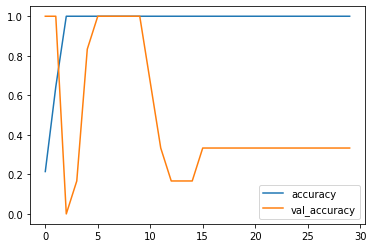

In [57]:
results[['accuracy', 'val_accuracy']].plot()

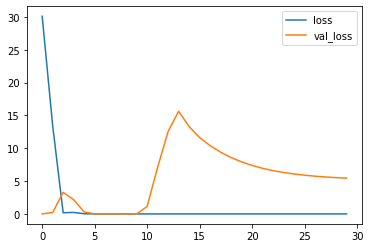

In [58]:
results[['loss', 'val_loss']].plot()